In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

from Global import Global
from Utilities import Utilities
ut = Utilities()
import matplotlib.pyplot as plt

import numpy as np

import networkx as nx

In [15]:
start = (80.,80.)
finish = (20.,70.)

glob = Global(ut.TestMap(),start,finish)

vertices = glob.navPoints()
edges = glob.computePaths()

In [16]:
vertices[0]

(80.0, 80.0)

In [17]:
edges[0]

((80.0, 80.0), [70.0, 35.0])

### Graph plotting function

In [18]:
def netPlot(G,path=False,start = False, finish = False):
    def generatePos(nodes):
        pos = {}
        for node in nodes:
            pos[node] = [node[0],-node[1]] # node[1] is negative because we use top-right coords
        return pos

    pos = generatePos(G.nodes)
    
    nx.draw(G,pos,edge_cmap=plt.cm.Blues)
    
    if path != False:
        nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
        path_edges = []
        for i in range(len(path)-1):
            edge = (path[i],path[i+1])
            path_edges.append(edge)
        nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=3)
    if start != False:
        nx.draw_networkx_nodes(G,pos,nodelist=[start],node_color='g')
    if start != False:    
        nx.draw_networkx_nodes(G,pos,nodelist=[finish],node_color='b')
    plt.show()

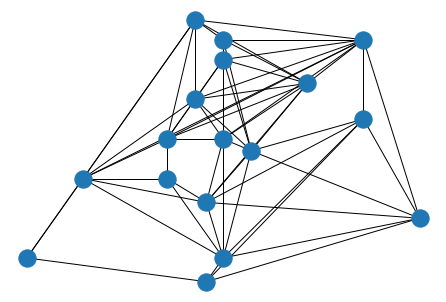

In [19]:
G = glob.computeGraph()
netPlot(G)

### Shortest Path computation

In [20]:
#lol c pas dur
path = nx.shortest_path(G,source=start,target=finish)

In [21]:
path

[(80.0, 80.0), (70.0, 35.0), (20.0, 70.0)]

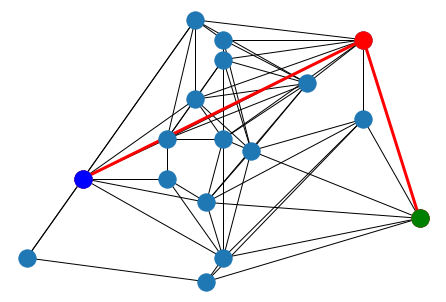

In [22]:
netPlot(G,path,start,finish)

### Converting back the graph path into geometric coordinates

In [23]:
graphPath = glob.returnPath(ut.TestMap(),start,finish)

In [24]:
graphPath

[(80.0, 80.0), (70.0, 35.0), (20.0, 70.0)]